In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
df  = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
df.shape

(768, 9)

In [13]:
X = df.iloc[: , :-1]
y = df['Outcome']

In [17]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)
X_train , X_test , y_train , y_test 

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 60             2       84              0              0        0   0.0   
 618            9      112             82             24        0  28.2   
 346            1      139             46             19       83  28.7   
 294            0      161             50              0        0  21.9   
 231            6      134             80             37      370  46.2   
 ..           ...      ...            ...            ...      ...   ...   
 71             5      139             64             35      140  28.6   
 106            1       96            122              0        0  22.4   
 270           10      101             86             37        0  45.6   
 435            0      141              0              0        0  42.4   
 102            0      125             96              0        0  22.5   
 
      DiabetesPedigreeFunction  Age  
 60                      0.304   21  
 618                  

In [21]:
from sklearn.tree import DecisionTreeClassifier

treeClassifier = DecisionTreeClassifier()
treeClassifier.fit(X_train , y_train)

DecisionTreeClassifier()

In [25]:
y_pred = treeClassifier.predict(X_test)

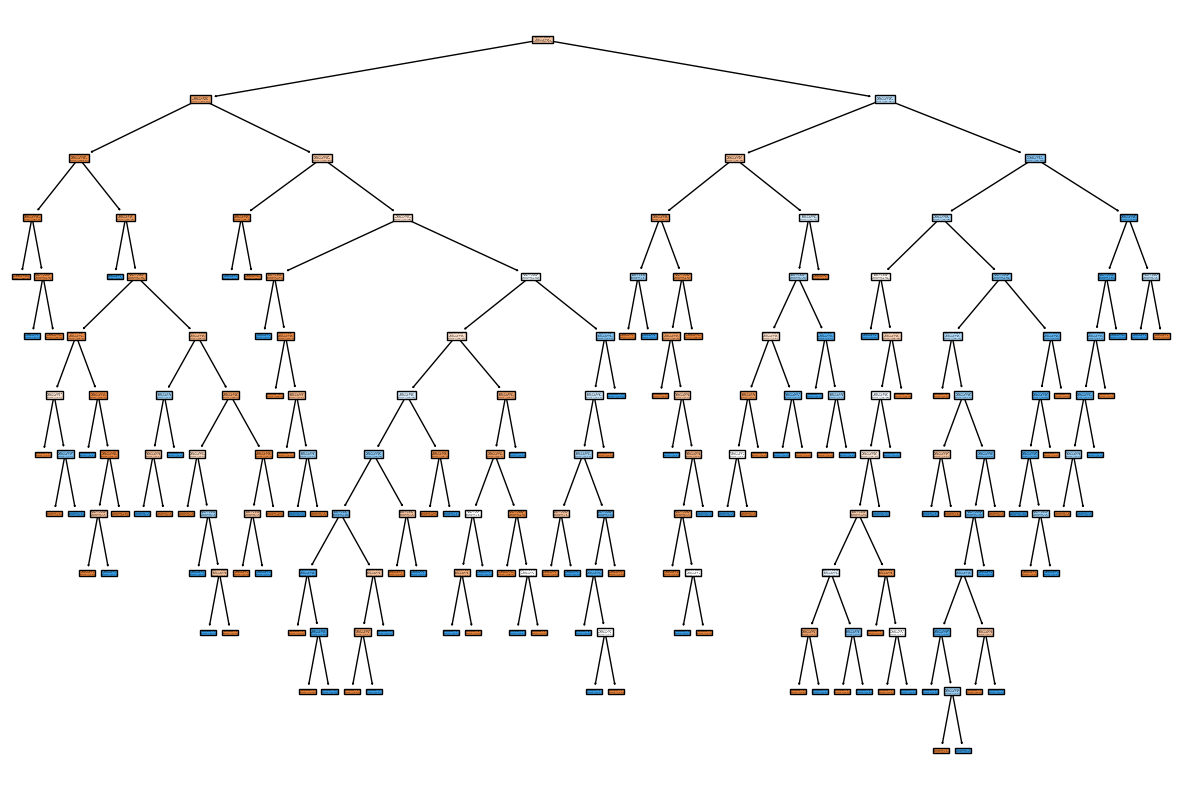

In [24]:
from sklearn import tree
plt.figure(figsize=(15,10))

tree.plot_tree(treeClassifier , filled=True)
plt.show()

In [29]:
from sklearn.metrics import classification_report , accuracy_score

print(accuracy_score(y_pred , y_test)) 
print(classification_report(y_pred , y_test))

0.7467532467532467
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        92
           1       0.71      0.63      0.67        62

    accuracy                           0.75       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.74      0.75      0.74       154



In [30]:
from sklearn.model_selection import GridSearchCV


In [31]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
    
}

In [32]:

gd = GridSearchCV(treeClassifier , param_grid=parameter  ,cv = 10 , scoring='accuracy')

In [33]:
gd.fit(X_train , y_train)

c:\Program Files\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
300 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Program Files\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Program Files\Python311\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Program Files\Python311\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Program Files\Python311\Lib\s

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [34]:
gd.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [37]:
y_pred2 = gd.predict(X_test)

In [38]:
print(accuracy_score(y_pred2 , y_test))

0.7012987012987013
